## Compare model fit parameters (and MI) across different model architectures

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import helpers as helper
from nems import get_setting

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2020-04-08 211006.log


In [97]:
db_path = get_setting('NEMS_RESULTS_DIR')
batch = 307
cutoff = .5  # octaves from target freq to be considered ON BF
r0_threshold = 0  # min value of st.pup0.afl0 r_test in order to be considered a sig. sensory response

In [4]:
# =============== load sdexp models ===============
st_sig = 'st.pup.afl'
p0 = 'st.pup0.afl'
b0 = 'st.pup.afl0'
st_sig0 = 'st.pup0.afl0'
sdexp_afl = helper.preprocess_sdexp_dump('d_{}_sdexp_pup_afl.csv'.format(batch),
                                 full_model=st_sig, p0=p0, b0=b0, shuf_model=st_sig0,
                                 r0_threshold=r0_threshold, octave_cutoff=cutoff, path=db_path)
st_sig = 'st.pup.afl.pxf'
p0 = 'st.pup0.afl.pxf0'
b0 = 'st.pup.afl0.pxf0'
st_sig0 = 'st.pup0.afl0.pxf0'
sdexp_afl_pxf = helper.preprocess_sdexp_dump('d_{}_sdexp_pup_afl_pxf.csv'.format(batch),
                                 full_model=st_sig, p0=p0, b0=b0, shuf_model=st_sig0,
                                 r0_threshold=r0_threshold, octave_cutoff=cutoff, path=db_path)

# ================== load stategain model(s) ==================
st_sig = 'st.pup.fil'
p0 = 'st.pup0.fil'
b0 = 'st.pup.fil0'
st_sig0 = 'st.pup0.fil0'
stategain_fil = helper.preprocess_stategain_dump('d_{}_pup_fil_stategain.csv'.format(batch),
                                 full_model=st_sig, p0=p0, b0=b0, shuf_model=st_sig0,
                                 r0_threshold=r0_threshold, octave_cutoff=cutoff, path=db_path)

## MI comparisons

In [80]:
sg_vs_sdafl = stategain_fil.merge(sdexp_afl, left_index=True, right_index=True)
sg_vs_sdafl = sg_vs_sdafl[sg_vs_sdafl['state_chan_alt_x']==sg_vs_sdafl['state_chan_alt_y']]
sg_vs_sdaflpxf = stategain_fil.merge(sdexp_afl_pxf, left_index=True, right_index=True)
sg_vs_sdaflpxf = sg_vs_sdaflpxf[sg_vs_sdaflpxf['state_chan_alt_x']==sg_vs_sdaflpxf['state_chan_alt_y']]

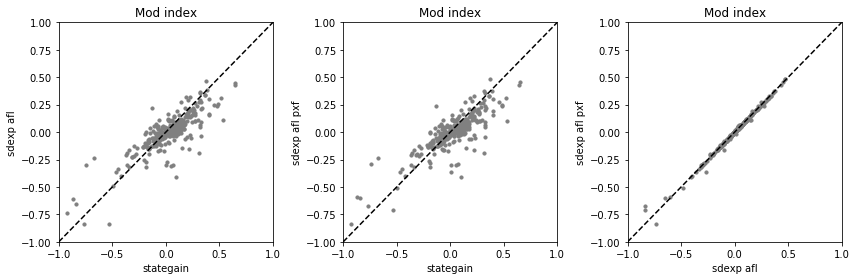

In [81]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))

axlim = 1
ax[0].scatter(sg_vs_sdafl['MI_task_x'], sg_vs_sdafl['MI_task_y'], color='grey', s=10)
ax[0].plot([-axlim, axlim], [-axlim, axlim], 'k--')
ax[0].set_xlim((-axlim, axlim))
ax[0].set_ylim((-axlim, axlim))
ax[0].set_ylabel('sdexp afl')
ax[0].set_xlabel('stategain')
ax[0].set_title('Mod index')

ax[1].scatter(sg_vs_sdaflpxf['MI_task_x'], sg_vs_sdaflpxf['MI_task_y'], color='grey', s=10)
ax[1].plot([-axlim, axlim], [-axlim, axlim], 'k--')
ax[1].set_xlim((-axlim, axlim))
ax[1].set_ylim((-axlim, axlim))
ax[1].set_ylabel('sdexp afl pxf')
ax[1].set_xlabel('stategain')
ax[1].set_title('Mod index')

ax[2].scatter(sdexp_afl['MI_task'], sdexp_afl_pxf['MI_task'], color='grey', s=10)
ax[2].plot([-axlim, axlim], [-axlim, axlim], 'k--')
ax[2].set_xlim((-axlim, axlim))
ax[2].set_ylim((-axlim, axlim))
ax[2].set_ylabel('sdexp afl pxf')
ax[2].set_xlabel('sdexp afl')
ax[2].set_title('Mod index')

f.tight_layout()

## Task gain comparisons

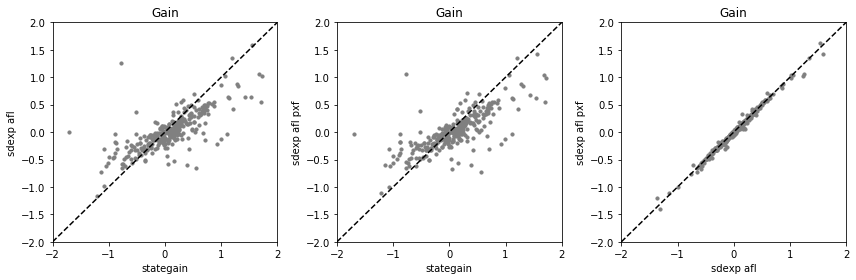

In [82]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].scatter(sg_vs_sdafl['gain_task_x'], sg_vs_sdafl['gain_task_y'], color='grey', s=10)
ax[0].plot([-2, 2], [-2, 2], 'k--')
ax[0].set_xlim((-2, 2))
ax[0].set_ylim((-2, 2))
ax[0].set_ylabel('sdexp afl')
ax[0].set_xlabel('stategain')
ax[0].set_title('Gain')

ax[1].scatter(sg_vs_sdaflpxf['gain_task_x'], sg_vs_sdaflpxf['gain_task_y'], color='grey', s=10)
ax[1].plot([-2, 2], [-2, 2], 'k--')
ax[1].set_xlim((-2, 2))
ax[1].set_ylim((-2, 2))
ax[1].set_ylabel('sdexp afl pxf')
ax[1].set_xlabel('stategain')
ax[1].set_title('Gain')

ax[2].scatter(sdexp_afl['gain_task'], sdexp_afl_pxf['gain_task'], color='grey', s=10)
ax[2].plot([-2, 2], [-2, 2], 'k--')
ax[2].set_xlim((-2, 2))
ax[2].set_ylim((-2, 2))
ax[2].set_ylabel('sdexp afl pxf')
ax[2].set_xlabel('sdexp afl')
ax[2].set_title('Gain')

f.tight_layout()

## Task DC comparisons

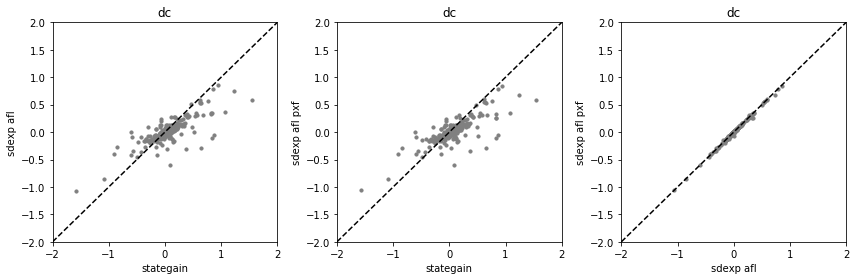

In [95]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].scatter(sg_vs_sdafl['dc_task_x'], sg_vs_sdafl['dc_task_y'], color='grey', s=10)
ax[0].plot([-2, 2], [-2, 2], 'k--')
ax[0].set_xlim((-2, 2))
ax[0].set_ylim((-2, 2))
ax[0].set_ylabel('sdexp afl')
ax[0].set_xlabel('stategain')
ax[0].set_title('dc')

ax[1].scatter(sg_vs_sdaflpxf['dc_task_x'], sg_vs_sdaflpxf['dc_task_y'], color='grey', s=10)
ax[1].plot([-2, 2], [-2, 2], 'k--')
ax[1].set_xlim((-2, 2))
ax[1].set_ylim((-2, 2))
ax[1].set_ylabel('sdexp afl pxf')
ax[1].set_xlabel('stategain')
ax[1].set_title('dc')

ax[2].scatter(sdexp_afl['dc_task'], sdexp_afl_pxf['dc_task'], color='grey', s=10)
ax[2].plot([-2, 2], [-2, 2], 'k--')
ax[2].set_xlim((-2, 2))
ax[2].set_ylim((-2, 2))
ax[2].set_ylabel('sdexp afl pxf')
ax[2].set_xlabel('sdexp afl')
ax[2].set_title('dc')

f.tight_layout()

In [93]:
d = stategain_fil.iloc[100]
cellid = d.name
stategain_fil.loc[cellid][['state_chan_alt', 'gain_task']]

,state_chan_alt,gain_task
cellid,,
BRT033b-45-1,ACTIVE_1,0.428207
BRT033b-45-1,ACTIVE_2,0.670490


In [90]:
sdexp_afl.loc[cellid][['state_chan_alt', 'gain_task']]

,state_chan_alt,gain_task
cellid,,
BRT033b-45-1,ACTIVE_1,-0.305432
BRT033b-45-1,ACTIVE_2,-0.021498


In [91]:
sg_vs_sdafl[['gain_task_x', 'gain_task_y']].loc[cellid]

,gain_task_x,gain_task_y
cellid,,
BRT033b-45-1,0.428207,-0.305432
BRT033b-45-1,0.670490,-0.021498
